In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from keras.layers import concatenate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from PIL import Image

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
model = Sequential()
model.add(Conv2D(input_shape=(56, 56, 1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [47]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Mnist

In [48]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((-1, 28, 28, 1)) / 255.0

test_images = test_images.reshape((-1, 28, 28, 1)) / 255.0

In [49]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
469/469 [==============================] - 585s 1s/step - loss: 0.9782 - accuracy: 0.6127 - val_loss: 0.4453 - val_accuracy: 0.8409
Epoch 2/10
469/469 [==============================] - 633s 1s/step - loss: 0.3527 - accuracy: 0.8703 - val_loss: 0.3403 - val_accuracy: 0.8714
Epoch 3/10
469/469 [==============================] - 638s 1s/step - loss: 0.2852 - accuracy: 0.8962 - val_loss: 0.2867 - val_accuracy: 0.8969
Epoch 4/10
469/469 [==============================] - 636s 1s/step - loss: 0.2523 - accuracy: 0.9095 - val_loss: 0.2770 - val_accuracy: 0.9024
Epoch 5/10
469/469 [==============================] - 649s 1s/step - loss: 0.2248 - accuracy: 0.9187 - val_loss: 0.2460 - val_accuracy: 0.9150
Epoch 6/10
469/469 [==============================] - 693s 1s/step - loss: 0.2068 - accuracy: 0.9257 - val_loss: 0.2524 - val_accuracy: 0.9105
Epoch 7/10
469/469 [==============================] - 635s 1s/step - loss: 0.1875 - accuracy: 0.9331 - val_loss: 0.2551 - val_accuracy: 0.9115

In [50]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 14s 44ms/step - loss: 0.2389 - accuracy: 0.9184
Test accuracy: 0.91839998960495


In [51]:
model.save('saved_model.h5')


In [ ]:
#loaded_model = tf.keras.models.load_model('my_model.h5')

In [52]:
from keras.layers import concatenate
import tensorflow as tf

img_a_in = tf.keras.layers.Input(shape = train_images.shape[1:], name = 'ImageA_Input')
img_b_in = tf.keras.layers.Input(shape = train_images.shape[1:], name = 'ImageB_Input')

img_a_feat = model(img_a_in)
img_b_feat = model(img_b_in)

features = concatenate([img_a_feat, img_b_feat], name = 'merge_features')
features = tf.keras.layers.Dense(16, activation='linear')(features)
features = tf.keras.layers.BatchNormalization()(features)
features = tf.keras.layers.Activation('relu')(features)
features = tf.keras.layers.Dense(4, activation='linear')(features)
features = tf.keras.layers.BatchNormalization()(features)
features = tf.keras.layers.Activation('relu')(features)
features = tf.keras.layers.Dense(1, activation='sigmoid')(features)

siamese_model = tf.keras.models.Model(inputs = [img_a_feat, img_b_feat], outputs = [features], name = 'Siamese_model')
siamese_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mae'])
siamese_model.summary()

Model: "Siamese_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 merge_features (Concatenate)   (None, 20)           0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense_18 (Dense)               (None, 16)           336         ['merge_features[1][0

In [53]:
train_groups = [train_images[np.where(train_labels==i)[0]] for i in np.unique(train_labels)]
test_groups = [test_images[np.where(test_labels==i)[0]] for i in np.unique(train_labels)]

In [54]:
print('train groups:', [x.shape[0] for x in train_groups])
print('test groups:', [x.shape[0] for x in test_groups])

train groups: [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]
test groups: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [61]:
def gen_random_batch(in_groups, batch_halfsize=8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size=batch_halfsize)
        out_img_a += [
            in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))]
            for c_idx in group_idx
        ]
        if match_group:
            b_group_idx = group_idx
            out_score += [1] * batch_halfsize
        else:
            non_group_idx = [
                np.random.choice([i for i in all_groups if i != c_idx])
                for c_idx in group_idx
            ]
            b_group_idx = non_group_idx
            out_score += [0] * batch_halfsize
        out_img_b += [
            in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))]
            for c_idx in b_group_idx
        ]
    return np.stack(out_img_a, 0), np.stack(out_img_b, 0), np.stack(out_score, 0)

In [63]:
import keras
new_model = keras.Model(inputs=model.input, outputs=model.layers[-2].output, name='FeatureExtractor')
new_model.summary()

Model: "FeatureExtractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_140_input (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 conv2d_140 (Conv2D)         (None, 28, 28, 64)        640       
                                                                 
 conv2d_141 (Conv2D)         (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_142 (Conv2D)         (None, 14, 14, 128)       73856     
                                                                 
 conv2d_143 (Conv2D)         (None, 14, 14, 128)  

In [65]:
img_a_in = layers.Input(shape=train_images.shape[1:], name="ImageA_Input")
img_b_in = layers.Input(shape=train_images.shape[1:], name="ImageB_Input")
img_a_feat = new_model(img_a_in)
img_b_feat = new_model(img_b_in)
combined_features = layers.concatenate([img_a_feat, img_b_feat], name="merge_features")
combined_features = layers.Dense(256, activation="linear")(combined_features)
combined_features = layers.BatchNormalization()(combined_features)
combined_features = layers.Activation("relu")(combined_features)
combined_features = layers.Dense(128, activation="linear")(combined_features)
combined_features = layers.BatchNormalization()(combined_features)
combined_features = layers.Activation("relu")(combined_features)
combined_features = layers.Dense(1, activation="sigmoid")(combined_features)
similarity_model = models.Model(
    inputs=[img_a_in, img_b_in], outputs=[combined_features], name="SimilarityModel"
)
similarity_model.summary()

Model: "SimilarityModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ImageA_Input (InputLayer)      [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 ImageB_Input (InputLayer)      [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 FeatureExtractor (Functional)  (None, 4096)         26516672    ['ImageA_Input[0][0]',           
                                                                  'ImageB_Input[0][0]']           
                                                                                                  
 merge_features (Concatenate)   (None, 8192)         0           ['FeatureExtractor[

In [66]:
similarity_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["mae"])

1/1 [==============================] - 0s 164ms/step


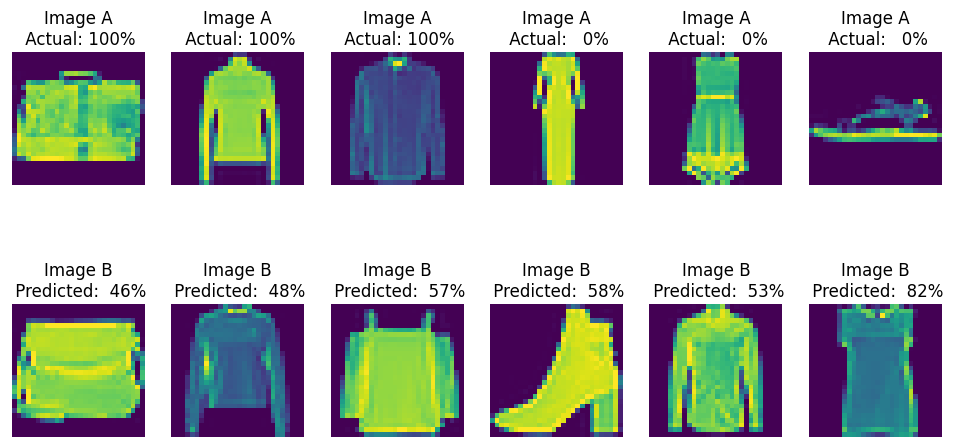

In [67]:
def show_model_output(nb_examples=3):
    pv_a, pv_b, pv_sim = gen_random_batch(test_groups, nb_examples)
    pred_sim = similarity_model.predict([pv_a, pv_b])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize=(12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim, m_axs.T):
        ax1.imshow(c_a[:, :, 0])
        ax1.set_title("Image A\n Actual: %3.0f%%" % (100 * c_d))
        ax1.axis("off")
        ax2.imshow(c_b[:, :, 0])
        ax2.set_title("Image B\n Predicted: %3.0f%%" % (100 * p_d))
        ax2.axis("off")
    return fig

_ = show_model_output()

In [69]:
def siam_gen(in_groups, batch_size=32):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(train_groups, batch_size // 2)
        yield [pv_a, pv_b], pv_sim


valid_a, valid_b, valid_sim = gen_random_batch(test_groups, 1024)
loss_history = similarity_model.fit_generator(
    siam_gen(train_groups),
    steps_per_epoch=50,
    validation_data=([valid_a, valid_b], valid_sim),
    epochs=10,
    verbose=True,
)

Epoch 1/10


C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_17284\806223502.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  loss_history = similarity_model.fit_generator(


50/50 [==============================] - 39s 784ms/step - loss: 0.1610 - mae: 0.0917 - val_loss: 0.1874 - val_mae: 0.1023
Epoch 2/10
50/50 [==============================] - 46s 922ms/step - loss: 0.1842 - mae: 0.1067 - val_loss: 0.1687 - val_mae: 0.0919
Epoch 3/10
50/50 [==============================] - 42s 840ms/step - loss: 0.1513 - mae: 0.0944 - val_loss: 0.2116 - val_mae: 0.0975
Epoch 4/10
50/50 [==============================] - 39s 790ms/step - loss: 0.1787 - mae: 0.1004 - val_loss: 0.2057 - val_mae: 0.1058
Epoch 5/10
50/50 [==============================] - 43s 855ms/step - loss: 0.1823 - mae: 0.1079 - val_loss: 0.1704 - val_mae: 0.0893
Epoch 6/10
50/50 [==============================] - 46s 920ms/step - loss: 0.1596 - mae: 0.0958 - val_loss: 0.1867 - val_mae: 0.0891
Epoch 7/10
50/50 [==============================] - 39s 782ms/step - loss: 0.1662 - mae: 0.0940 - val_loss: 0.1914 - val_mae: 0.0890
Epoch 8/10
50/50 [==============================] - 39s 783ms/step - loss: 0.147

1/1 [==============================] - 0s 41ms/step


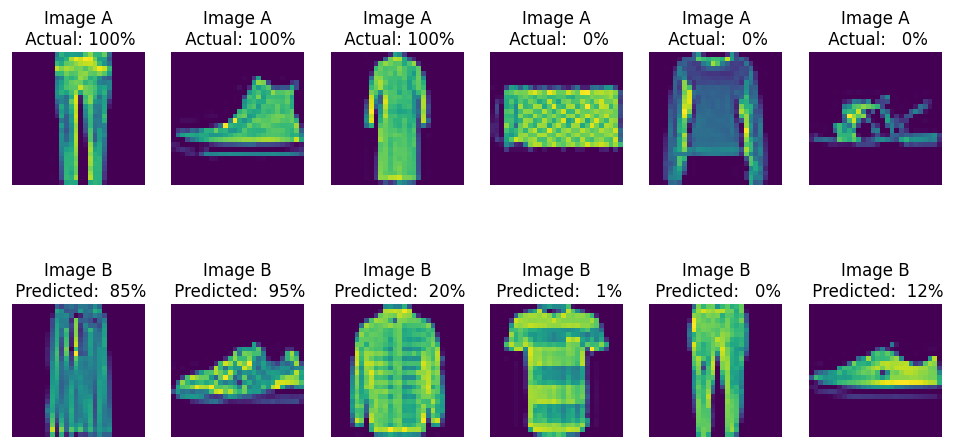

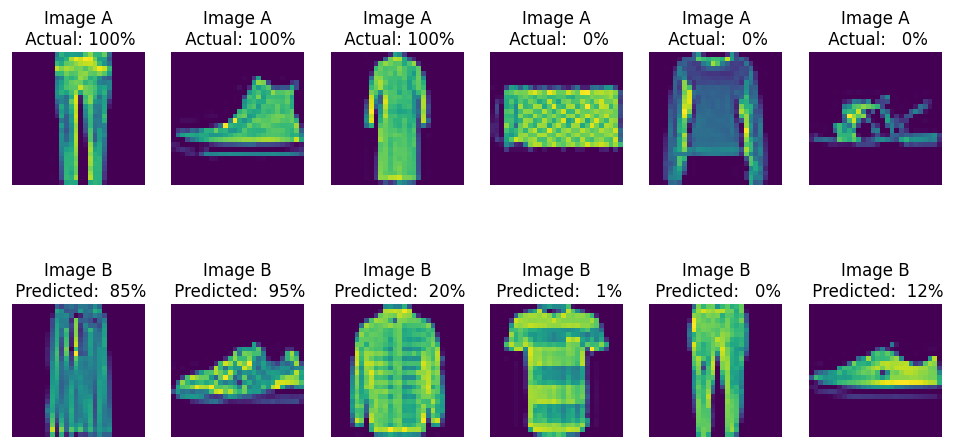

In [70]:
show_model_output()

In [72]:
x_test_features = new_model.predict(test_images, verbose=True, batch_size=256)

40/40 [==============================] - 7s 178ms/step


In [73]:
%%time
from sklearn.manifold import TSNE

tsne_obj = TSNE(
    n_components=2,
    init="pca",
    random_state=101,
    method="barnes_hut",
    n_iter=500,
    verbose=2,
)
tsne_features = tsne_obj.fit_transform(x_test_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.018s...
[t-SNE] Computed neighbors for 10000 samples in 10.797s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 66.799774
[t-SNE] Computed conditional probabilities in 0.399s
[t-SNE] Iteration 50: error = 82.1132736, gradient norm = 0.0268510 (50 iterations in 1.065s)
[t-SNE] 

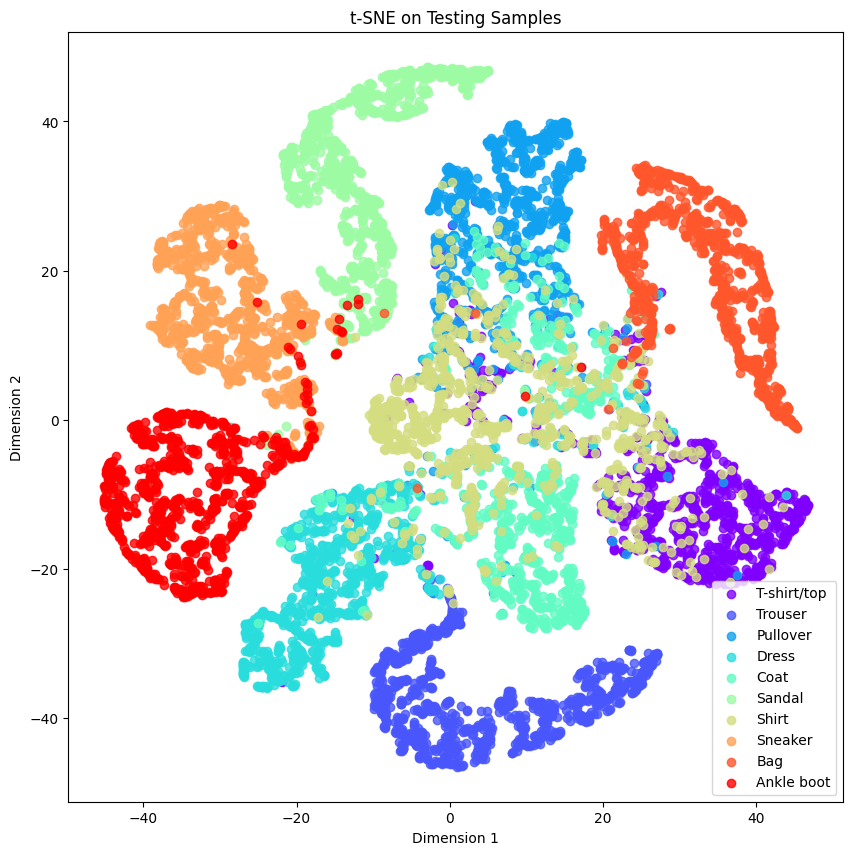

In [75]:
obj_categories = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))
for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
    plt.scatter(
        tsne_features[np.where(test_labels == c_group), 0],
        tsne_features[np.where(test_labels == c_group), 1],
        marker="o",
        color=c_color,
        linewidth=1,
        alpha=0.8,
        label=c_label,
    )
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("t-SNE on Testing Samples")
plt.legend(loc="best")
# plt.savefig('clothes-dist.png')
plt.show(block=False)